# CROP PRODUCTION ANALYSIS

## Machine Learning project cycle

- Understanding the Problem Statement,
- Data Collection
- Data Checks for problems
- Exploratory Data analysis
- Data preprocessing 
- Model Training
- chosing the best model

# 1 Problem Statement

This project seeks to understand the crop produced in 48 locations considering four crops since the year 1970. Variables afecting productivity includes date(year), subject(crops), location, value, measure, frequency and flag codes

# 2 Data Collection

- The data used was collected from  https://www.kaggle.com/datasets/thedevastator/the-relationship-between-crop-production-and-cli
- The data has 20566 enteries and a total of 9 columns

## 2.1 Importing neccessary Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('data/crop_production.csv')

# Change csv to Dataframe

In [5]:
df.head(5)

,index,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,0,AUS,CROPYIELD,RICE,TONNE_HA,A,1990,8.314607,NaN
1,1,AUS,CROPYIELD,RICE,TONNE_HA,A,1991,8.394737,NaN
2,2,AUS,CROPYIELD,RICE,TONNE_HA,A,1992,8.094340,NaN
3,3,AUS,CROPYIELD,RICE,TONNE_HA,A,1993,8.336000,NaN
4,4,AUS,CROPYIELD,RICE,TONNE_HA,A,1994,8.537815,NaN


# shape of the data

In [6]:
df.shape

(20566, 9)

# Data Information

- Index
- Location
- places where the crops were produced
- indicator= only one indicator was used wihich is cropyield
- subject is the kind of crops produced
- measure= Tones by hecter
- Frequency=A
- Time= year of record
- value is the amount harvested

# 3 Data Checks

- Missing Vales
- Duplicated Values
- Data type
- number of rows and column
- statistics of the data
- check the categories in each column

### Checking for missing values

In [7]:
df.isnull().sum()

index             0
LOCATION          0
INDICATOR         0
SUBJECT           0
MEASURE           0
FREQUENCY         0
TIME              0
Value             0
Flag Codes    20566
dtype: int64

### Observation 1

- No missing value found

### Checking for duplicate values

In [8]:
df.duplicated().sum()

0

### Observation 2

- no duplicate values

### Checking for data type

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20566 entries, 0 to 20565
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       20566 non-null  int64  
 1   LOCATION    20566 non-null  object 
 2   INDICATOR   20566 non-null  object 
 3   SUBJECT     20566 non-null  object 
 4   MEASURE     20566 non-null  object 
 5   FREQUENCY   20566 non-null  object 
 6   TIME        20566 non-null  int64  
 7   Value       20566 non-null  float64
 8   Flag Codes  0 non-null      float64
dtypes: float64(2), int64(2), object(5)
memory usage: 1.4+ MB


### Observation 3

- index and Time is int
- Location, Indicator, Subject, Frequency and measure are all objects
- value and flag codes are float values

### Observation 4

- There are 9 columns 20565 rows

### Checking for statistics

In [11]:
df.describe()

,index,TIME,Value,Flag Codes
count,20566.000000,20566.000000,2.056600e+04,0.0
mean,10282.500000,2007.591170,1.249281e+04,NaN
std,5937.037154,10.369489,5.960529e+04,NaN
min,0.000000,1970.000000,0.000000e+00,NaN
25%,5141.250000,1999.000000,1.961877e+00,NaN
50%,10282.500000,2008.000000,2.560970e+01,NaN
75%,15423.750000,2017.000000,1.563000e+03,NaN
max,20565.000000,2025.000000,1.146044e+06,NaN


### Observation 5

- The flag code column is not needed as it is mostly empty
- The mean value of crops produced generally is 12492.8 tonnes
- The minimum value of crops produced generally is 0.0 tonnes
- The maximum value of crops produced generally is 1146044 tonnes

### Checking for categories

- useful categories includes Location and subject

### Checking for location

In [12]:
df['LOCATION'].unique()

array(['AUS', 'CAN', 'JPN', 'KOR', 'MEX', 'NZL', 'TUR', 'USA', 'DZA',
       'ARG', 'BGD', 'BRA', 'CHL', 'CHN', 'COL', 'EGY', 'ETH', 'GHA',
       'IND', 'IDN', 'IRN', 'KAZ', 'MYS', 'MOZ', 'NGA', 'PAK', 'PRY',
       'PER', 'PHL', 'RUS', 'SAU', 'ZAF', 'SDN', 'TZA', 'THA', 'UKR',
       'URY', 'VNM', 'ZMB', 'WLD', 'SSA', 'OECD', 'BRICS', 'NOR', 'CHE',
       'EU28', 'ISR', 'HTI'], dtype=object)

In [13]:
df['LOCATION'].nunique()

48

### Observation 6

- There are 48 unique Locations where production was observed

### Checking for subject

In [14]:
df['SUBJECT'].unique()

array(['RICE', 'WHEAT', 'MAIZE', 'SOYBEAN'], dtype=object)

### Observation 7 

- There are only four crops monitored in this exercise

### Checking for total crop produced since 1970

In [15]:
df['Value'].sum()

256927080.66239846

- This states that the total amount of crops produced since 1970 is 256927089

### Checking for the total production in 2025 alone

In [16]:
df[df['TIME']==2025]['Value'].sum()

9667601.59339038

- Total Production in 2025 is 9667601.593

# Exploratory Data Analysis

In [17]:
df.head()

,index,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,0,AUS,CROPYIELD,RICE,TONNE_HA,A,1990,8.314607,NaN
1,1,AUS,CROPYIELD,RICE,TONNE_HA,A,1991,8.394737,NaN
2,2,AUS,CROPYIELD,RICE,TONNE_HA,A,1992,8.094340,NaN
3,3,AUS,CROPYIELD,RICE,TONNE_HA,A,1993,8.336000,NaN
4,4,AUS,CROPYIELD,RICE,TONNE_HA,A,1994,8.537815,NaN


#### Checking for which crop was most produced

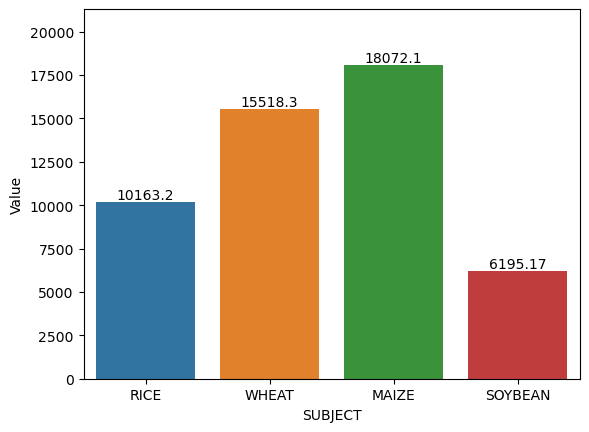

In [18]:
ax=sns.barplot(data=df, x=df['SUBJECT'], y=df['Value'], errwidth=0)

for i in ax.containers:
    ax.bar_label(i,)

- It is observed that Maize is the most produced followed by wheat and then rice. Soybeans is the least produced among the crops

### Representing the above in pi chart to see the percentage production

- Group the values using subject
- Create a data from the grouped data
- Convert the data to a dataframe
- plot it in pi chart

In [19]:
df['Value'].groupby(df['SUBJECT']).sum()

SUBJECT
MAIZE      9.308960e+07
RICE       5.232026e+07
SOYBEAN    3.176886e+07
WHEAT      7.974837e+07
Name: Value, dtype: float64

In [20]:
X=pd.DataFrame(df['Value'].groupby(df['SUBJECT']).sum())

In [21]:
X

,Value
SUBJECT,
MAIZE,9.308960e+07
RICE,5.232026e+07
SOYBEAN,3.176886e+07
WHEAT,7.974837e+07


([<matplotlib.patches.Wedge at 0x2016e25b850>,
 [Text(0.4610932279261932, 0.9986956669379335, 'MAIZE'),
  Text(-1.0721936983651905, 0.2457654841225172, 'RICE'),
  Text(-0.7641015567103023, -0.7912956533640841, 'SOYBEAN'),
  Text(0.6171679191879782, -0.9105513491973869, 'WHEAT')],
 [Text(0.25150539705065084, 0.5447430910570545, '36%'),
  Text(-0.5848329263810129, 0.13405390043046392, '20%'),
  Text(-0.4167826672965285, -0.43161581092586404, '12%'),
  Text(0.3366370468298062, -0.4966643722894837, '31%')])

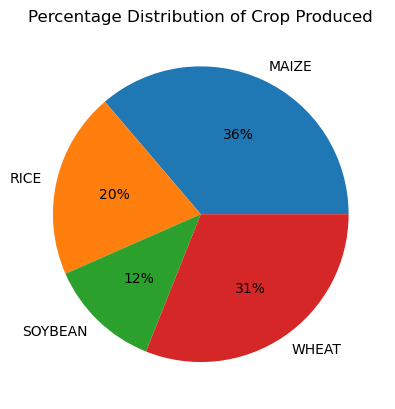

In [22]:
plt.title("Percentage Distribution of Crop Produced")
plt.pie(X['Value'], labels=X.index,  autopct='%.0f%%') 

- This shows that Maize produced is 36%, Wheat is 32%, rice is 20% and soybeans 12%


### Finding out which location had more production

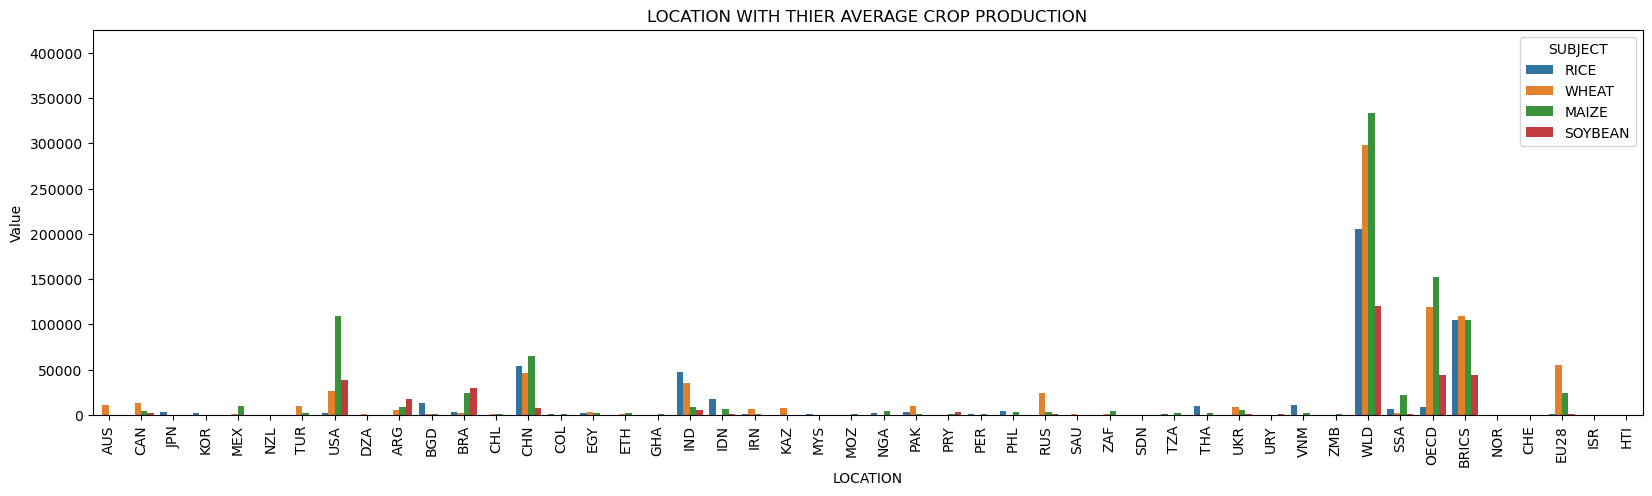

In [23]:
plt.figure(figsize=(20,5))
sns.barplot(data=df, x='LOCATION', y='Value', errwidth=0, hue='SUBJECT').set(title="LOCATION WITH THIER AVERAGE CROP PRODUCTION")
plt.xticks(rotation=90)
plt.show()

- More production is seen in WLD, OECD, BRICS, USA

Validation of the above graph

In [26]:
Y=df.groupby('LOCATION')['Value'].sum().sort_values(ascending=False)

In [27]:
Y

LOCATION
WLD      9.109790e+07
BRICS    3.928982e+07
OECD     3.075673e+07
USA      1.905230e+07
CHN      1.874887e+07
IND      1.039364e+07
EU28     7.646839e+06
BRA      6.459889e+06
ARG      3.570866e+06
SSA      3.385960e+06
RUS      3.050608e+06
IDN      2.612489e+06
CAN      1.991026e+06
UKR      1.636886e+06
PAK      1.567278e+06
BGD      1.542723e+06
VNM      1.329572e+06
THA      1.323521e+06
AUS      1.275756e+06
TUR      1.255830e+06
MEX      1.216650e+06
KAZ      9.021100e+05
PHL      8.355704e+05
IRN      7.807141e+05
EGY      7.376116e+05
NGA      6.781276e+05
ZAF      6.383206e+05
PRY      4.903965e+05
JPN      4.013467e+05
ETH      3.819660e+05
TZA      3.175589e+05
KOR      2.106797e+05
URY      1.725114e+05
PER      1.502474e+05
DZA      1.492705e+05
COL      1.438601e+05
MOZ      1.224538e+05
CHL      1.210839e+05
ZMB      1.158975e+05
GHA      8.876876e+04
MYS      8.410126e+04
SAU      6.746361e+04
CHE      3.185732e+04
SDN      2.897200e+04
NZL      2.327612e+04
H

### Finding out the four least productive locations

In [28]:
YZ=df.groupby('LOCATION')['Value'].sum().sort_values(ascending=True)

In [29]:
YZ

LOCATION
ISR      8.752803e+03
NOR      1.594475e+04
HTI      2.306312e+04
NZL      2.327612e+04
SDN      2.897200e+04
CHE      3.185732e+04
SAU      6.746361e+04
MYS      8.410126e+04
GHA      8.876876e+04
ZMB      1.158975e+05
CHL      1.210839e+05
MOZ      1.224538e+05
COL      1.438601e+05
DZA      1.492705e+05
PER      1.502474e+05
URY      1.725114e+05
KOR      2.106797e+05
TZA      3.175589e+05
ETH      3.819660e+05
JPN      4.013467e+05
PRY      4.903965e+05
ZAF      6.383206e+05
NGA      6.781276e+05
EGY      7.376116e+05
IRN      7.807141e+05
PHL      8.355704e+05
KAZ      9.021100e+05
MEX      1.216650e+06
TUR      1.255830e+06
AUS      1.275756e+06
THA      1.323521e+06
VNM      1.329572e+06
BGD      1.542723e+06
PAK      1.567278e+06
UKR      1.636886e+06
CAN      1.991026e+06
IDN      2.612489e+06
RUS      3.050608e+06
SSA      3.385960e+06
ARG      3.570866e+06
BRA      6.459889e+06
EU28     7.646839e+06
IND      1.039364e+07
CHN      1.874887e+07
USA      1.905230e+07
O

NZL,HTI, NOR and ISR are the least productive location

In [30]:
Y[:4]

LOCATION
WLD      9.109790e+07
BRICS    3.928982e+07
OECD     3.075673e+07
USA      1.905230e+07
Name: Value, dtype: float64

In [31]:
Y[-4:]

LOCATION
NZL    23276.119840
HTI    23063.121889
NOR    15944.745159
ISR     8752.803397
Name: Value, dtype: float64

In [32]:
YX=pd.DataFrame(Y[:4])

In [33]:
YX

,Value
LOCATION,
WLD,9.109790e+07
BRICS,3.928982e+07
OECD,3.075673e+07
USA,1.905230e+07


In [34]:
YXX=pd.DataFrame(Y[-4:])

In [35]:
YXX

,Value
LOCATION,
NZL,23276.119840
HTI,23063.121889
NOR,15944.745159
ISR,8752.803397


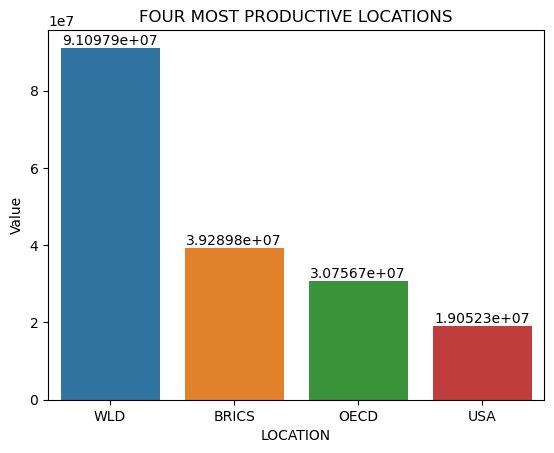

In [36]:
plt.Figure(figsize=(8,4))
plt.title("FOUR MOST PRODUCTIVE LOCATIONS")
ax=sns.barplot(data=YX, y='Value', x=YX.index)
for i in ax.containers:
    ax.bar_label(i,)

plt.show()

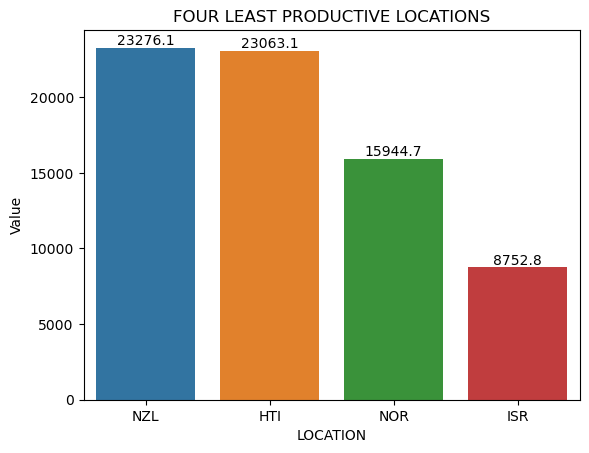

In [37]:
plt.Figure(figsize=(8,4))
plt.title("FOUR LEAST PRODUCTIVE LOCATIONS")
ax=sns.barplot(data=YXX, y='Value', x=YXX.index)
for i in ax.containers:
    ax.bar_label(i,)

plt.show()

### Analyzing each location observed to find out what they produce

In [38]:
# tho find out the distribution of the produced crop in WLD
HIGH1=df[df['LOCATION']=='WLD'].groupby('SUBJECT').sum()['Value']

In [39]:
# tho find out the distribution of the produced crop in BRICS
HIGH2=df[df['LOCATION']=='BRICS'].groupby('SUBJECT').sum()['Value']

In [41]:
# tho find out the distribution of the produced crop in OEDC
HIGH3=df[df['LOCATION']=='OECD'].groupby('SUBJECT').sum()['Value']

In [42]:
# tho find out the distribution of the produced crop in USA
HIGH4=df[df['LOCATION']=='USA'].groupby('SUBJECT').sum()['Value']

In [46]:
HIGH1=pd.DataFrame(HIGH1)
HIGH1

,Value
SUBJECT,
MAIZE,3.237292e+07
RICE,1.990692e+07
SOYBEAN,1.113577e+07
WHEAT,2.768230e+07


In [47]:
HIGH2=pd.DataFrame(HIGH2)
HIGH2

,Value
SUBJECT,
MAIZE,1.137569e+07
RICE,1.135108e+07
SOYBEAN,4.710424e+06
WHEAT,1.185262e+07


In [50]:
HIGH3=pd.DataFrame(HIGH3)
HIGH3

,Value
SUBJECT,
MAIZE,1.479765e+07
RICE,8.602128e+05
SOYBEAN,4.051557e+06
WHEAT,1.104731e+07


In [51]:
HIGH4=pd.DataFrame(HIGH4)
HIGH4

,Value
SUBJECT,
MAIZE,1.174944e+07
RICE,2.745323e+05
SOYBEAN,4.159714e+06
WHEAT,2.868608e+06


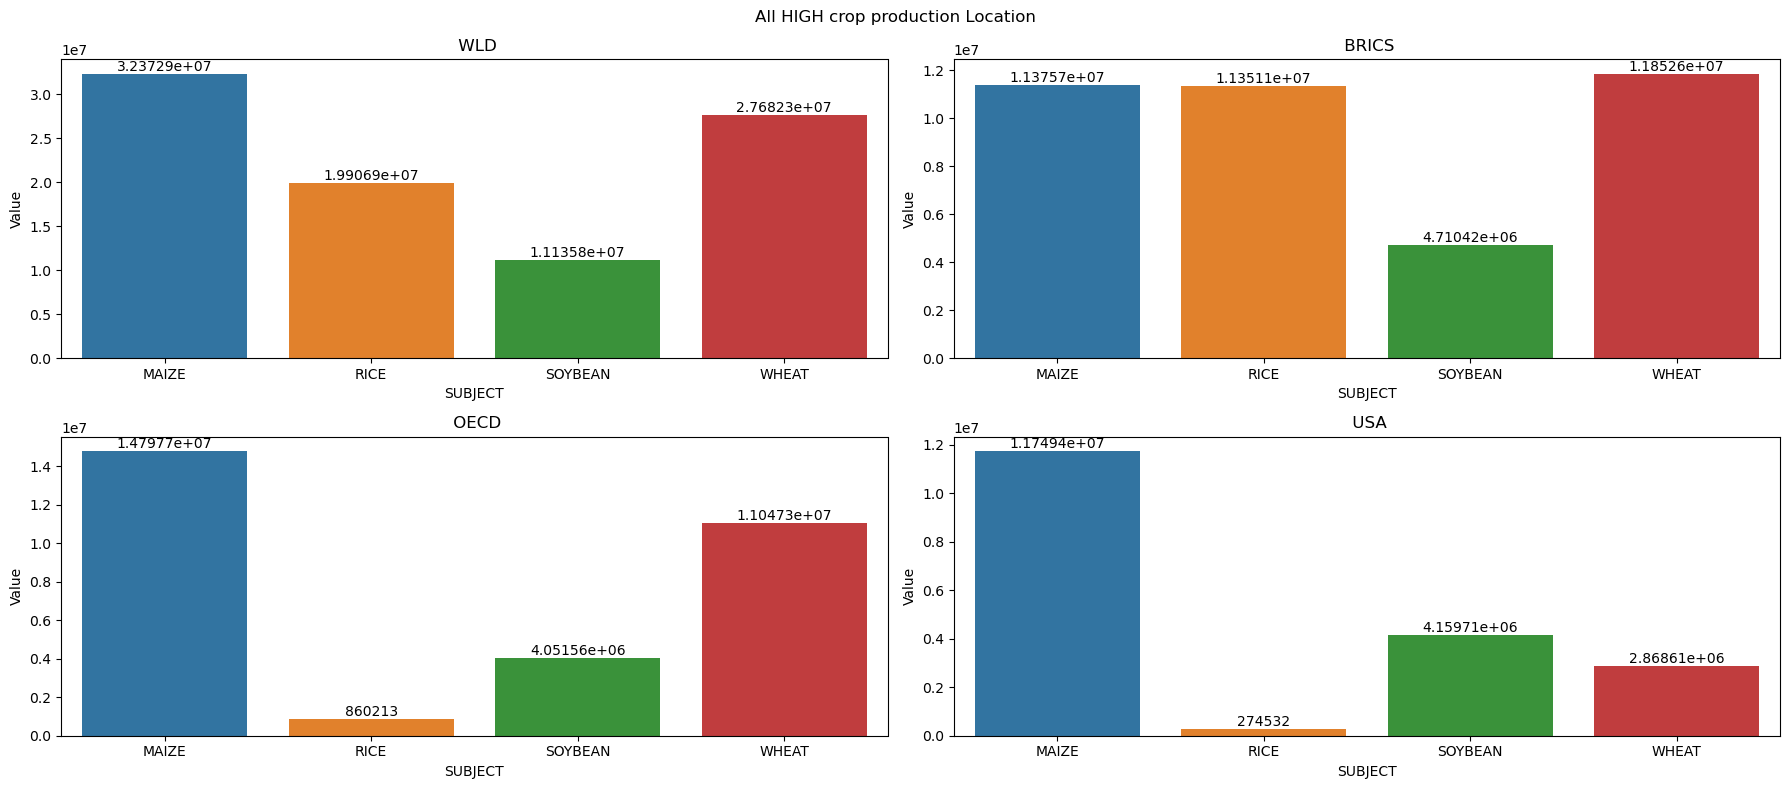

In [52]:
fig, axes = plt.subplots(2, 2, figsize=(18, 8))
 
fig.suptitle('All HIGH crop production Location')
 
a1=sns.barplot(ax=axes[0, 0], data=HIGH1, y='Value', x=HIGH1.index).set(title=" WLD")
a2=sns.barplot(ax=axes[0, 1], data=HIGH2, y='Value', x=HIGH2.index).set(title=" BRICS")
a3=sns.barplot(ax=axes[1, 0], data=HIGH3, y='Value', x=HIGH3.index).set(title=" OECD")
a4=sns.barplot(ax=axes[1, 1], data=HIGH4, y='Value', x=HIGH4.index).set(title=" USA")

for i in axes[0,0].containers:
    axes[0,0].bar_label(i,)

for j in axes[0,1].containers:
    axes[0,1].bar_label(j,)

for k in axes[1,0].containers:
    axes[1,0].bar_label(k,)

for l in axes[1,1].containers:
    axes[1,1].bar_label(l,)

plt.tight_layout()
plt.show()

### Displaying in percentage

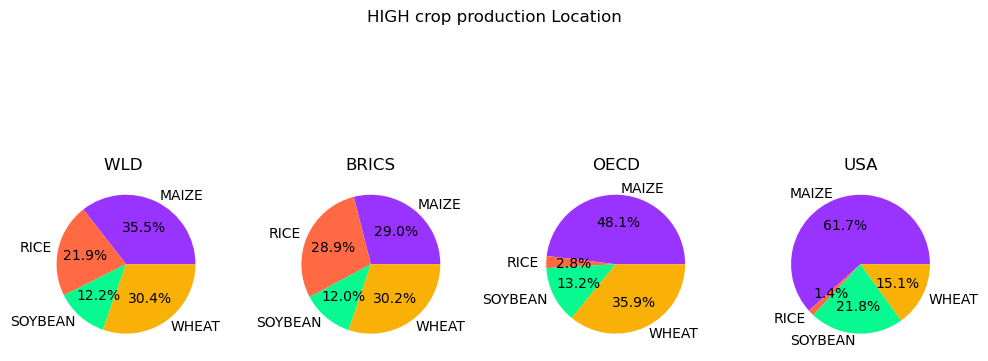

In [53]:
fig, axes = plt.subplots(1, 4, figsize=(10, 5))
 
fig.suptitle('HIGH crop production Location')
axes[0].pie(HIGH1['Value'], labels=HIGH1.index,autopct='%1.1f%%', colors=['#9933ff', '#FF6943', '#07F990', '#F9B007'])
axes[0].set_title('WLD ')

axes[1].pie(HIGH2['Value'], labels=HIGH2.index,autopct='%1.1f%%',colors=['#9933ff', '#FF6943', '#07F990', '#F9B007'])
axes[1].set_title('BRICS')

axes[2].pie(HIGH3['Value'], labels=HIGH3.index,autopct='%1.1f%%',colors=['#9933ff', '#FF6943', '#07F990', '#F9B007'])
axes[2].set_title('OECD')

axes[3].pie(HIGH4['Value'], labels=HIGH4.index,autopct='%1.1f%%',colors=['#9933ff', '#FF6943', '#07F990', '#F9B007'])
axes[3].set_title('USA')

plt.tight_layout()
plt.show()

### Observation

- in WLD Maize is most produced which is 35.5% of the total production
- in WLD Wheat is the second most produced which is 30.4% of the total production
- in WLD Rice is the third most produced which is 21.9% of the total production
- in WLD soybeans is the sleast produced which is 12.2% of the total production

- in BRICS Wheat is most produced which is 30.2% of the total production
- in BRICS Maize is the second most produced which is 29.0% of the total production
- in BRICS Rice is the third most produced which is 28.9% of the total production
- in BRICS soybeans is the sleast produced which is 12.0% of the total production

- in OECD Maize is most produced which is 48.1% of the total production
- in OECD Wheat is the second most produced which is 35.9% of the total production
- in OECD Soybeans is the third most produced which is 13.2% of the total production
- in OECD Rice is the sleast produced which is 2.8% of the total production

- in USA Maize is most produced which is 61.7% of the total production
- in USA Soybeans is the second most produced which is 21.8% of the total production
- in USA Wheat is the third most produced which is 15.1% of the total production
- in USA Rice is the sleast produced which is 1.4% of the total production

In [54]:
#low production
LOW1= df[df['LOCATION']=='NZL'].groupby('SUBJECT').sum()['Value']
LOW1=pd.DataFrame(LOW1)

LOW2= df[df['LOCATION']=='HTI'].groupby('SUBJECT').sum()['Value']
LOW2=pd.DataFrame(LOW2)

LOW3= df[df['LOCATION']=='NOR'].groupby('SUBJECT').sum()['Value']
LOW3=pd.DataFrame(LOW3)

LOW4= df[df['LOCATION']=='ISR'].groupby('SUBJECT').sum()['Value']
LOW4=pd.DataFrame(LOW4)

LOW1

,Value
SUBJECT,
MAIZE,8199.418393
RICE,0.000000
SOYBEAN,0.005600
WHEAT,15076.695847


In [55]:
LOW2

,Value
SUBJECT,
MAIZE,18252.709934
RICE,4737.686830
SOYBEAN,36.962396
WHEAT,35.762728


In [56]:
LOW3

,Value
SUBJECT,
MAIZE,108.000000
RICE,0.000000
SOYBEAN,0.000000
WHEAT,15836.745159


In [57]:
LOW4

,Value
SUBJECT,
MAIZE,1094.627928
RICE,36.200185
SOYBEAN,36.995401
WHEAT,7584.979882


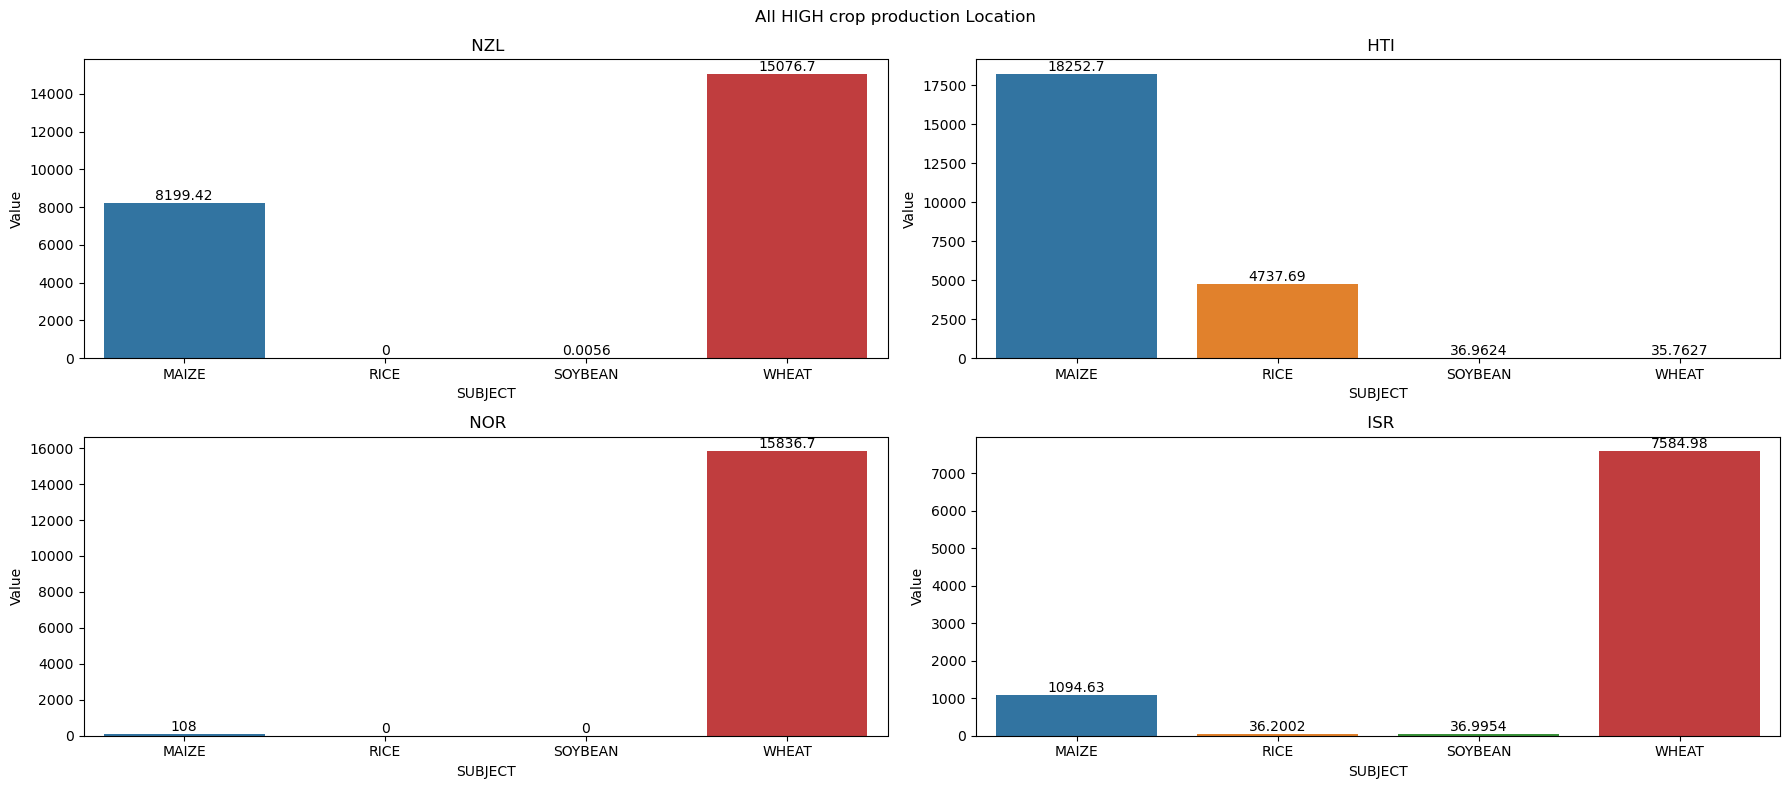

In [60]:
fig, axes = plt.subplots(2, 2, figsize=(18, 8))
 
fig.suptitle('All HIGH crop production Location')
 
a1=sns.barplot(ax=axes[0, 0], data=LOW1, y='Value', x=LOW1.index).set(title=" NZL")
a2=sns.barplot(ax=axes[0, 1], data=LOW2, y='Value', x=LOW2.index).set(title=" HTI")
a3=sns.barplot(ax=axes[1, 0], data=LOW3, y='Value', x=LOW3.index).set(title=" NOR")
a4=sns.barplot(ax=axes[1, 1], data=LOW4, y='Value', x=LOW4.index).set(title=" ISR")

for i in axes[0,0].containers:
    axes[0,0].bar_label(i,)

for j in axes[0,1].containers:
    axes[0,1].bar_label(j,)

for k in axes[1,0].containers:
    axes[1,0].bar_label(k,)

for l in axes[1,1].containers:
    axes[1,1].bar_label(l,)

plt.tight_layout()
plt.show()

### Observation

- in NZL Wheat is most produced crop
- in NZL Maize is the second most produced crop
- in NZL Soybeans is the third most produced crop
- in NZL Rice is not produced at all

- in HTI Maize is most produced crop
- in HTI Rice is the second most produced crop
- in HTI Soybeans is the third most produced crop
- in HTI Wheat is the leat produced crop

- in NOR Wheat is most produced crop
- in NOR Maize is the second most produced crop
- in NOR Soybeans is not produced at all
- in NOR Rice is not produced at all

- in ISR Wheat is most produced crop
- in ISR Maize is the second most produced crop
- in ISR Soybeans is the third most produced crop
- in ISR Rice is the least produced crop

### Finding out the percentage productivity

In [62]:
df[df['Value']==df['Value'].min()]

,index,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
72,72,CAN,CROPYIELD,RICE,TONNE_HA,A,1990,0.0,NaN
73,73,CAN,CROPYIELD,RICE,TONNE_HA,A,1991,0.0,NaN
74,74,CAN,CROPYIELD,RICE,TONNE_HA,A,1992,0.0,NaN
75,75,CAN,CROPYIELD,RICE,TONNE_HA,A,1993,0.0,NaN
76,76,CAN,CROPYIELD,RICE,TONNE_HA,A,1994,0.0,NaN
...,...,...,...,...,...,...,...,...,...
18021,18021,NZL,CROPYIELD,SOYBEAN,THND_HA,A,2021,0.0,NaN
18022,18022,NZL,CROPYIELD,SOYBEAN,THND_HA,A,2022,0.0,NaN
18023,18023,NZL,CROPYIELD,SOYBEAN,THND_HA,A,2023,0.0,NaN
18024,18024,NZL,CROPYIELD,SOYBEAN,THND_HA,A,2024,0.0,NaN


Counting data that shows no production

In [64]:
non_profiting_location=df[df['Value']==df['Value'].min()].count()['Value']

In [65]:
non_profiting_location

609

Non profiting outcomes is 609

In [66]:
df['Value'].count()

20566

Total data emtered is 20566

Counting production enteries

In [67]:
producing_locations=(df['Value'].count())-(df[df['Value']==df['Value'].min()].count()['Value'])

In [68]:
producing_locations

19957

In [69]:
profitability=[['producing_locations', 19957],['non_profiting_location',609]]

In [70]:
profitability

[['producing_locations', 19957], ['non_profiting_location', 609]]

In [71]:
data=pd.DataFrame(data =profitability, columns=['profiting_locations', 'non_profiting_location'])

In [72]:
data

,profiting_locations,non_profiting_location
0,producing_locations,19957
1,non_profiting_location,609


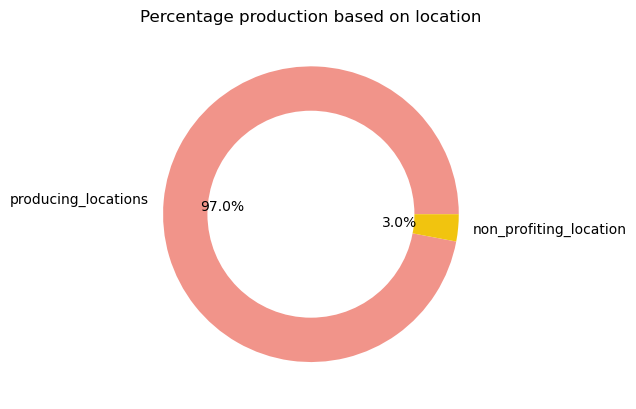

In [73]:
plt.Figure(figsize=(5,4))
plt.pie(data['non_profiting_location'], labels=data['profiting_locations'], autopct="%0.1f%%", colors=["#F1948A","#F1C40F"])
center_circle=plt.Circle((0,0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title('Percentage production based on location')
plt.show()

In [74]:
df[df['Value']==df['Value'].max()]

,index,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
15197,15197,WLD,CROPYIELD,MAIZE,THND_TONNE,A,2025,1146044.33,NaN


This shows that WLD will have more production in 2025

In [75]:
WLD_date=df[df['LOCATION']=='WLD']

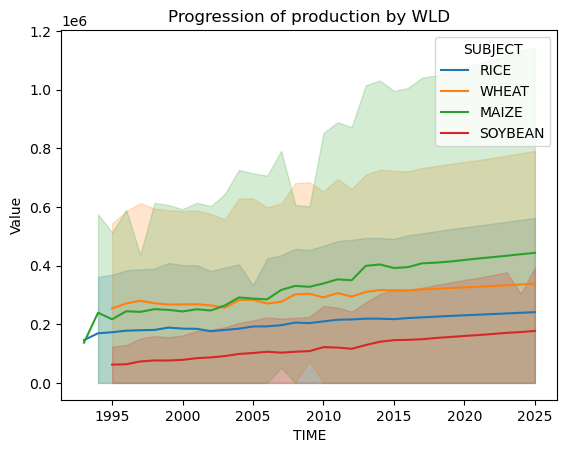

In [76]:
sns.lineplot(data=WLD_date, x='TIME', y='Value', color='#4A235A', hue='SUBJECT').set(title="Progression of production by WLD")
plt.show()

- This shows that maize production started before the production of rice. Althogh both started before 1995 when soybeans and wheat production started
- This aslo shows that there is progressive increase in production each year

In [77]:
BRICS=df[df['LOCATION']=='BRICS']

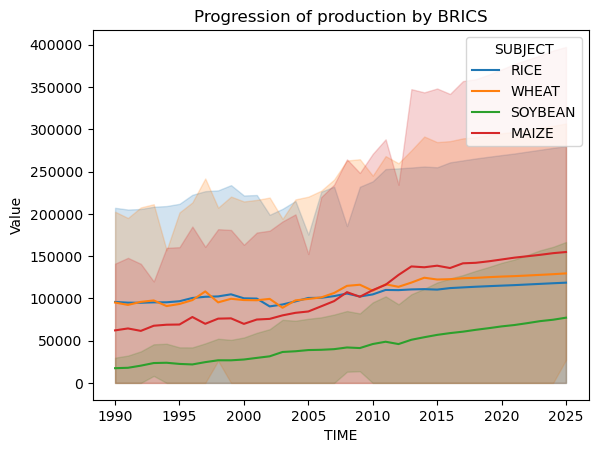

In [78]:
sns.lineplot(data=BRICS, x='TIME', y='Value', color='#1B4F72', hue='SUBJECT').set(title="Progression of production by BRICS")
plt.show()

- This shows that ther is a gradual increase in crop production in brics. But, more production is observed in maize and the wheat production
- All production started in the year 1990

In [79]:
OECD=df[df['LOCATION']=='OECD']

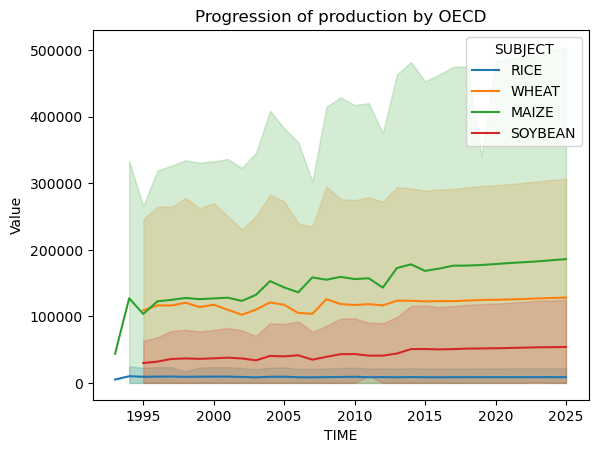

In [80]:
sns.lineplot(data=OECD, x='TIME', y='Value', color='#BA4A00', hue='SUBJECT').set(title="Progression of production by OECD")
plt.show()

- Althogh Rice production started before 1995 in OECD, after a slight rise, the volume of production has been almost constant
- Slightly before 1995, the production of maize is observed to spike up and maintain a gradual increases
- thogh Wheat is produced more than soybeans but both maintain gradual increase each year in terms of volume

In [81]:
USA=df[df['LOCATION']=='USA']

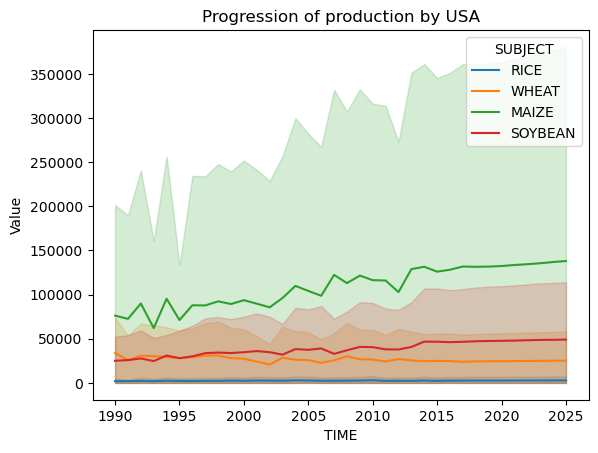

In [82]:
sns.lineplot(data=USA, x='TIME', y='Value', color='#0B5345',hue='SUBJECT').set(title="Progression of production by USA")
plt.show()

- in UAS the production of rice is almost not significant
- The production of maize and soybeans have ben on the rise while the production of wheat slightly declines

In [83]:
NZL=df[df['LOCATION']=='NZL']

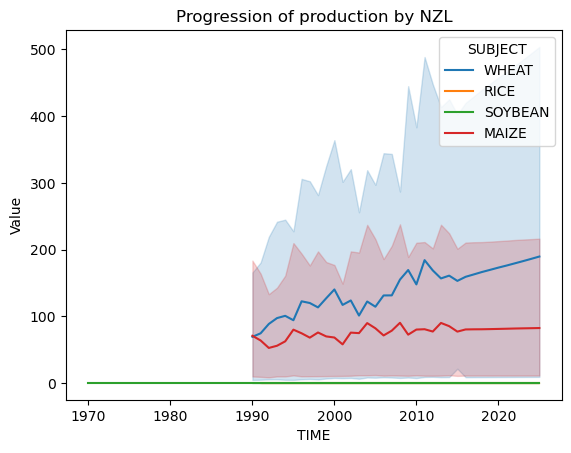

In [84]:
sns.lineplot(data=NZL, x='TIME', y='Value', color='#5F6A6A',hue='SUBJECT').set(title="Progression of production by NZL")
plt.show()

- this shows no production of soybeans and rice
- there is a beter production of wheat compared to maize

In [85]:
HTI=df[df['LOCATION']=='HTI']
HTI

,index,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
7504,7504,HTI,CROPYIELD,WHEAT,THND_TONNE,A,1990,0.000900,NaN
7505,7505,HTI,CROPYIELD,WHEAT,THND_TONNE,A,1991,0.000900,NaN
7506,7506,HTI,CROPYIELD,WHEAT,THND_TONNE,A,1992,0.000900,NaN
7507,7507,HTI,CROPYIELD,WHEAT,THND_TONNE,A,1993,0.000900,NaN
7508,7508,HTI,CROPYIELD,WHEAT,THND_TONNE,A,1994,0.000900,NaN
...,...,...,...,...,...,...,...,...,...
19353,19353,HTI,CROPYIELD,SOYBEAN,THND_HA,A,2021,0.000888,NaN
19354,19354,HTI,CROPYIELD,SOYBEAN,THND_HA,A,2022,0.000891,NaN
19355,19355,HTI,CROPYIELD,SOYBEAN,THND_HA,A,2023,0.000892,NaN
19356,19356,HTI,CROPYIELD,SOYBEAN,THND_HA,A,2024,0.000891,NaN


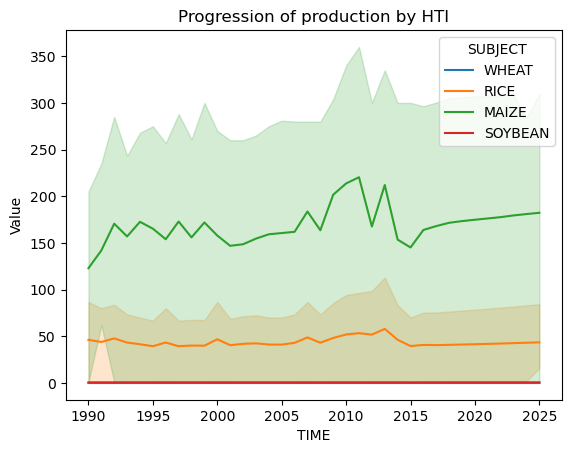

In [86]:
plt.Figure(figsize=(3,3))
sns.lineplot(data=HTI, x='TIME', y='Value', color='#D4AC0D',hue='SUBJECT').set(title="Progression of production by HTI")
plt.show()

- No production of soybeans and wheat
- while maize and rice shows steady production though almost at same volume all through

In [87]:
NOR=df[df['LOCATION']=='NOR']

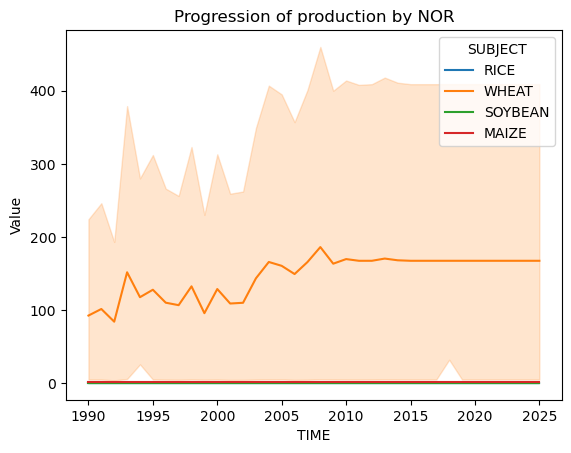

In [88]:
plt.Figure(figsize=(3,3))
sns.lineplot(data=NOR, x='TIME', y='Value', color='#212F3C',hue='SUBJECT').set(title="Progression of production by NOR")
plt.show()

- Only wheat was produced significantly

In [89]:
ISR=df[df['LOCATION']=='ISR']

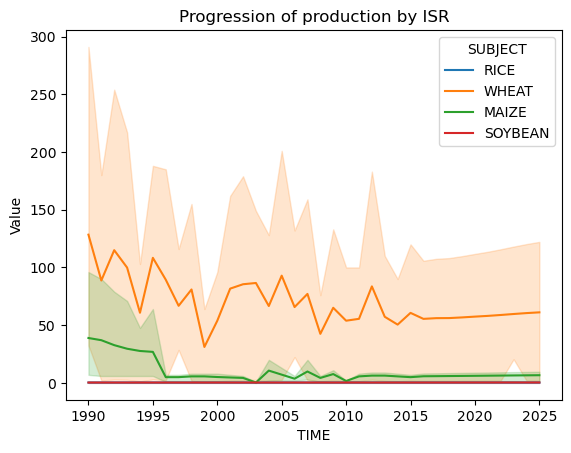

In [90]:
plt.Figure(figsize=(3,3))
sns.lineplot(data=ISR, x='TIME', y='Value', color='#A9DFBF', hue='SUBJECT').set(title="Progression of production by ISR")
plt.show()

- a steady decline in the production of maize and wheat is observed. also, no significant production in rice and soybeans is observed

### CONCLUSION

- better production is not dependednt on how early production started. This can be observed with newzealand which started production since 1970 but isnt among the best locations producing crops.
- ISR may expirience no food with time if efforst is not made to avert the decline in production